In [1]:
import sys 
sys.path.append("../")

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import cross_val_score
import umap
import sklearn
import pandas as pd 
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import catboost as cb 

from core.utils import (find_non_numerical_columns,categorize_columns,evaluate_cross_validation,
                   convert_df_to_numeric_df,scale_columns,evaluate_model,optimize_xgb)
%load_ext autoreload
%autoreload 2

/home/gregoryscafarto/ecovadis/.venv/lib64/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gregoryscafarto/ecovadis/.venv/lib64/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gregoryscafarto/ecovadis/.venv/lib64/python3.11/site-pac

In [2]:
df = pd.read_csv("../data/assignement_with_bert_sentiments")
target = df["Exited"]
numerical_df = convert_df_to_numeric_df(df,["RowNumber", "CustomerId", "Surname","CustomerFeedback","Exited"])
numerical_df["RatioSalary"] = numerical_df["EstimatedSalary"] /  (numerical_df["Balance (EUR)"]+1)
numerical_df["RatioProducst"] = numerical_df["NumberOfProducts"] / (numerical_df["Tenure"] +1)
numerical_df["RatioCards"] = numerical_df["HasCreditCard"] &  numerical_df["IsActiveMember"]
numerical_df["ProductSalary"] = numerical_df["Balance (EUR)"] *  numerical_df["CreditScore"]



scaled_df = scale_columns(numerical_df,columns=["EstimatedSalary","Balance (EUR)","CreditScore","Age","Tenure","RatioSalary",
                                    "RatioProducst","RatioCards","ProductSalary"])

In [3]:
scaled_df = scaled_df.reset_index(drop=True).drop(columns=["Unnamed: 0"])

In [25]:
threshold = 4000

In [26]:
from core.Metamodel import MetaModel

In [27]:
model = MetaModel(threshold)

In [28]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(scaled_df, target.values, test_size=0.2, random_state=0, stratify=target.values)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:20<00:00,  4.97trial/s, best loss: -0.796258508122915]
Best set of hyperparameters:  {'learning_rate': 0.05160899327429932, 'max_depth': 6, 'scale_pos_weight': 1, 'subsample': 0.7858823387255843}
 balanced accuracy is 0.728069363662584
 AUC is 0.728069363662584
100%|██████████| 10/10 [00:13<00:00,  1.30s/trial, best loss: -0.730580349224417]
Best set of hyperparameters:  {'iterations': 60, 'l2_leaf_reg': 9.125217194491064, 'learning_rate': 0.06339172086804998, 'max_depth': 6}
 balanced accuracy is 0.712888543397018
 AUC is 0.7128885433970179


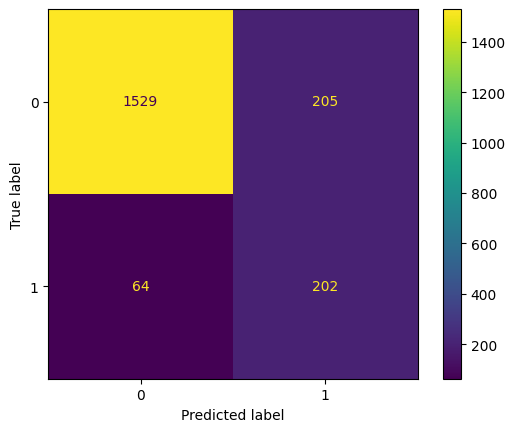

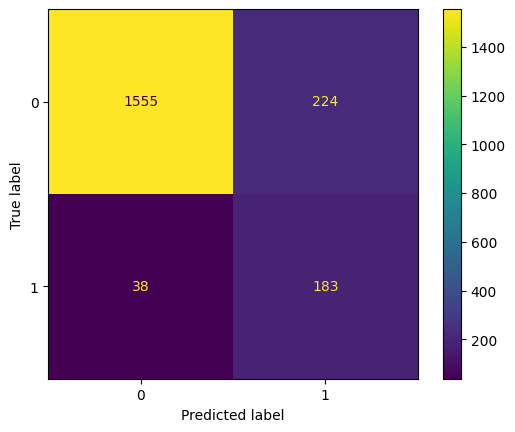

In [29]:
model.train(X_train,y_train,X_test,y_test)

 balanced accuracy is 0.49768181124113325
 AUC is 0.4976818112411333


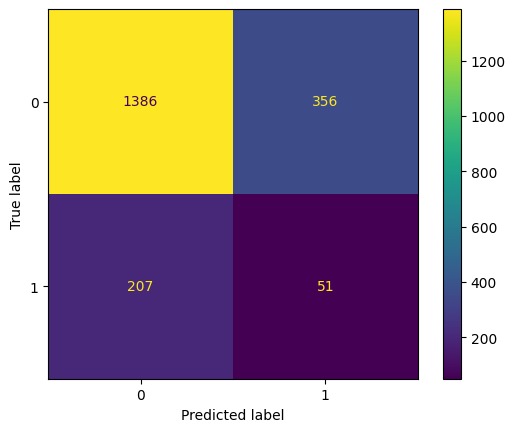

In [30]:
score = evaluate_model(X_test, y_test,model,verbose=True)

Ensembling leads to poor results on balanced accuracy